In [4]:
import pandas as pd

df = pd.read_csv('HIV_AIDS.csv', encoding='cp1251')

# Просмотр первых строк датафрейма
print("Первые 5 строк датасета:")
print(df.head())


Первые 5 строк датасета:
  Country/Region Adult prevalence of HIV/AIDS Number of people with HIV/AIDS  \
0      яEswatini                       28.30%                        240,000   
1       яLesotho                       26.20%                        445,000   
2      яBotswana                       22.80%                        399,100   
3      яZimbabwe                       22.10%                      1,660,000   
4  яSouth Africa                       14.40%                      9,400,000   

  Annual deaths from HIV/AIDS Year of estimate  
0                       3,000             2024  
1                       7,000             2025  
2                       5,275             2025  
3                      25,600             2024  
4                      80,000             2025  


In [5]:
print(df['Country/Region'].unique())

['яEswatini' 'яLesotho' 'яBotswana' 'яZimbabwe' 'яSouth Africa'
 'яMozambique' 'яMalawi' 'яEquatorial Guinea' 'яTanzania' 'яKenya'
 'яUganda' 'яTogo' 'яCameroon' 'яGabon' 'яCentral African Republic'
 'яGuinea-Bissau' 'яCongo, Republic of the' 'яBarbados' 'яRwanda'
 "яC“te d'Ivoire" 'яSouth Sudan' 'яGambia, The' 'яHaiti' 'яNigeria'
 'яBelize' 'яAngola' 'яGhana' 'яBahamas, The' 'яJamaica'
 'яSaint Vincent and the Grenadinesя[9]' 'яRussian Federation[10]'
 'яLiberia' 'яSierra Leone' 'яGuinea' 'яGuyana' 'яSuriname' 'яDjibouti'
 'яBurundi' 'яChad' 'яMali' 'яTrinidad and Tobago' 'яThailand' 'яEthiopia'
 'яUkraine' 'яBenin' 'яDominican Republic' 'яPapua New Guinea'
 'яCabo Verde' 'яPanama' 'яMyanmar' 'яBurkina Faso'
 'яCongo, Democratic Republic of' 'яGeorgia' 'яLatvia' 'яCambodia'
 'яVenezuela' 'яMoldova' 'яBrazil' 'яEritrea' 'яEl Salvador' 'яUruguay'
 'яMauritania' 'яChile' 'яGuatemala' 'яParaguay' 'яPortugal' 'яNiger'
 'яMalaysia' 'яIndonesia' 'яHonduras' 'яCuba' 'яCosta Rica' 'яColombia'


In [6]:
countries_to_keep_clean = ['яRussian Federation[10]', 'яJapan', 'яUnited Kingdom', 'яUnited States',
                           'яIndia', 'яGermany', 'яCanada', 'яMexico', 'яHong Kong', 'яFrance', 'яNiger']


filtered_df = df[df['Country/Region'].isin(countries_to_keep_clean)].copy()

print("Отфильтрованные страны:")
print(filtered_df['Country/Region'].unique())

Отфильтрованные страны:
['яRussian Federation[10]' 'яNiger' 'яUnited States' 'яFrance' 'яMexico'
 'яIndia' 'яGermany' 'яCanada' 'яUnited Kingdom' 'яHong Kong' 'яJapan']


In [7]:
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 30 to 156
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country/Region                  11 non-null     object
 1   Adult prevalence of HIV/AIDS    11 non-null     object
 2   Number of people with HIV/AIDS  11 non-null     object
 3   Annual deaths from HIV/AIDS     11 non-null     object
 4   Year of estimate                11 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [8]:
translation_dict = {
    'Country/Region': 'Страна/Регион',
    'Adult prevalence of HIV/AIDS': 'Распространенность ВИЧ среди взрослых (%)',
    'Number of people with HIV/AIDS': 'Число людей с ВИЧ/СПИД',
    'Annual deaths from HIV/AIDS': 'Ежегодные смерти от ВИЧ/СПИД',
    'Year of estimate': 'Год оценки'
}

# Переименовываем столбцы
df = filtered_df.rename(columns=translation_dict)

In [9]:
df['Страна/Регион'] = df['Страна/Регион'].str.replace('я', '', regex=False)

In [17]:
df.head(13)


,Страна/Регион,Распространенность ВИЧ среди взрослых (%),Число людей с ВИЧ/СПИД,Ежегодные смерти от ВИЧ/СПИД,Год оценки
30,Russian Federation,1.50%,"1,400,000[11]","24,000",2023
66,Niger,0.40%,2450000,56500,2024
76,United States,0.42%,"1,427,155",5660,2024[12]
78,France,0.30%,"231,791",760,2024
79,Mexico,0.75%,"371,820","5,120",2024
88,India,0.20%,"2,300,000","35,000",2024[13]
95,Germany,0.25%,"100,000",850,2023
96,Canada,0.21%,"75,000",220,2023[15]
102,United Kingdom,0.17%,"116,000[17]",614,2024
153,Hong Kong,0.16%,"11,737",120,2023


In [ ]:
df_p= df.copy()

In [ ]:
df_p['Распространенность ВИЧ среди взрослых (%)'] = (
    df_p['Распространенность ВИЧ среди взрослых (%)']
    .astype(str)
    .str.replace('%', '')  # удаляем %
    .astype(float)
)

df_p['Число людей с ВИЧ/СПИД'] = (
    df_p['Число людей с ВИЧ/СПИД']
    .astype(str)
    .str.replace('[^\d]', '', regex=True)  # удаляем скобки, запятые
    .replace('', '0')  # на случай пустых строк
    .astype(int)
)
df_p['Ежегодные смерти от ВИЧ/СПИД'] = (
    df_p['Ежегодные смерти от ВИЧ/СПИД']
    .astype(str)
    .str.replace(',', '')
    .astype(int)
)

In [ ]:
import pandas as pd
import numpy as np

# Добавляем население
population = {
    'Russian Federation': 146000000, 'India': 1400000000, 'United States': 331000000,
    'France': 67000000, 'Mexico': 126000000, 'Germany': 83000000,
    'Canada': 38000000, 'United Kingdom': 67000000, 'Japan': 125000000,
    'China': 7500000, 'Niger': 25000000
}
df_p['Население'] = df_p['Страна/Регион'].map(population)

# Целевая переменная
y = df_p['Число людей с ВИЧ/СПИД']

In [ ]:
df_p.head(12)

,Страна/Регион,Распространенность ВИЧ среди взрослых (%),Число людей с ВИЧ/СПИД,Ежегодные смерти от ВИЧ/СПИД,Год оценки,Население
30,Russian Federation,1.50%,1400000,24000,2023,146000000
66,Niger,0.40%,2450000,56500,2024,25000000
76,United States,0.42%,1427155,5660,2024,331000000
78,France,0.30%,231791,760,2024,67000000
79,Mexico,0.75%,371820,5120,2024,126000000
88,India,0.20%,2300000,35000,2024,1400000000
95,Germany,0.25%,100000,850,2023,83000000
96,Canada,0.21%,75000,220,2023,38000000
102,United Kingdom,0.17%,116000,614,2024,67000000
153,China,0.16%,11737,120,2023,7500000


In [ ]:
# Основные признаки
X = df_p[['Распространенность ВИЧ среди взрослых (%)',
        'Ежегодные смерти от ВИЧ/СПИД',
        'Население']].copy()

# Дополнительный признак: смертность на 1000 инфицированных
X['Смертность_на_1000'] = df_p['Ежегодные смерти от ВИЧ/СПИД'] / df_p['Число людей с ВИЧ/СПИД'] * 1000
X['Смертность_на_1000'] = X['Смертность_на_1000'].replace([np.inf, -np.inf], 0)

# Разделение данных
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Данные: {len(X_train)} на обучение, {len(X_test)} на тест")

Данные: 7 на обучение, 4 на тест


/tmp/ipython-input-144164727.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Смертность_на_1000'] = X['Смертность_на_1000'].replace([np.inf, -np.inf], 0)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Модель 1: Gradient Boosting
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Оценка
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("=" * 50)
print("GRADIENT BOOSTING RESULTS:")
print(f"Mean Absolute Error: {mae_gbr:,.0f} человек")
print(f"R² Score: {r2_gbr:.3f}")
print(f"Пример: предсказано {y_pred_gbr[0]:,.0f}, факт {y_test.iloc[0]:,.0f}")

GRADIENT BOOSTING RESULTS:
Mean Absolute Error: 193,127 человек
R² Score: 0.926
Пример: предсказано 2,196,643, факт 2,300,000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Модель 2: Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Оценка
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n" + "=" * 50)
print("RANDOM FOREST RESULTS:")
print(f"Mean Absolute Error: {mae_rf:,.0f} человек")
print(f"R² Score: {r2_rf:.3f}")


RANDOM FOREST RESULTS:
Mean Absolute Error: 349,952 человек
R² Score: 0.739


Страны в тестовой выборке:


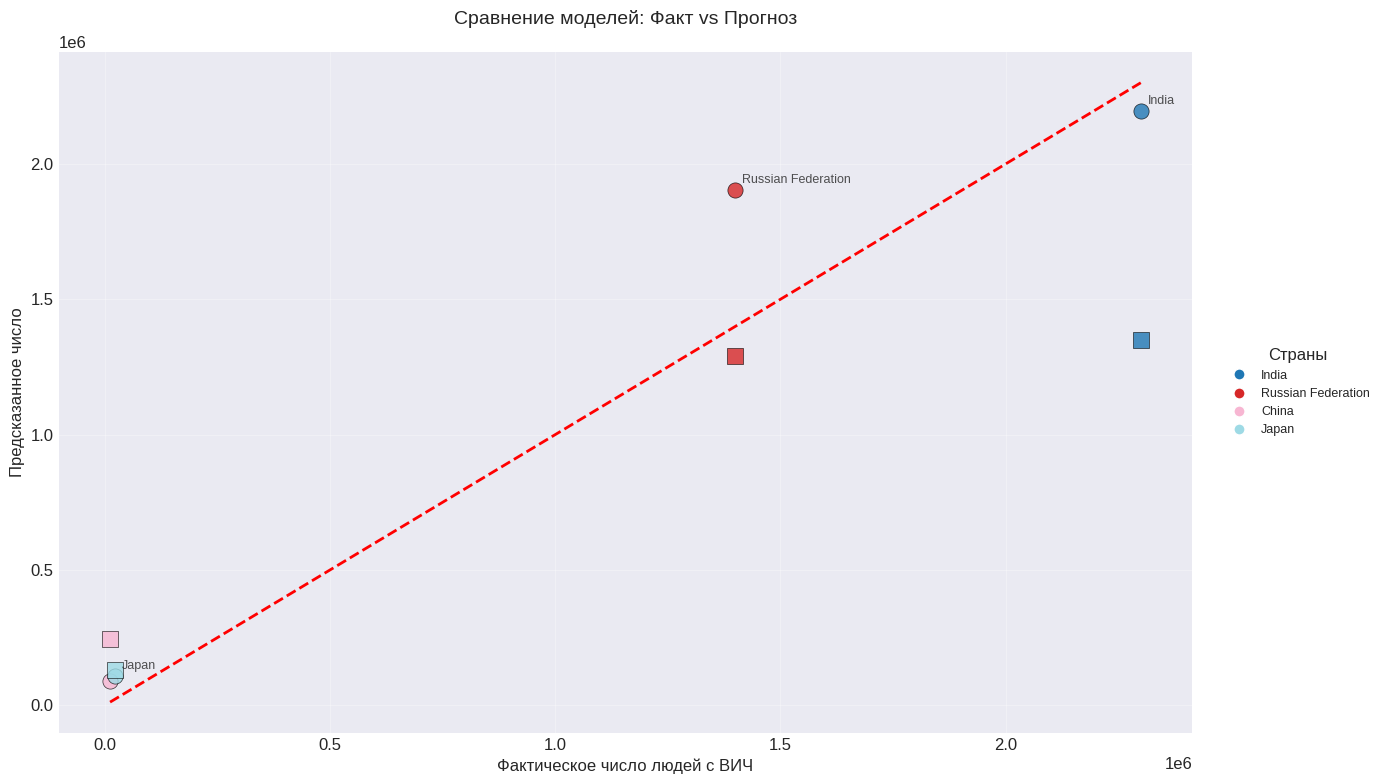

In [ ]:
# 1. Точечный график сравнения с цветами по странам
plt.figure(figsize=(14, 8))

# Создаем цветовую карту для стран
unique_countries = df_p.loc[y_test.index, 'Страна/Регион'].unique()
n_countries = len(unique_countries)

# Создаем цветовую палитру (можно использовать разные colormaps: 'tab20', 'Set3', 'viridis', 'plasma')
colors = plt.cm.tab20(np.linspace(0, 1, n_countries))

# Создаем словарь для соответствия страны и цвета
country_color_dict = {country: colors[i] for i, country in enumerate(unique_countries)}

# Рисуем точки для каждой модели с цветами стран
for i, country_idx in enumerate(y_test.index):
    country_name = df_p.loc[country_idx, 'Страна/Регион']
    country_color = country_color_dict[country_name]

    # Gradient Boosting - кружки
    plt.scatter(y_test.iloc[i], y_pred_gbr[i],
               alpha=0.8, s=120,
               color=country_color,
               edgecolors='black', linewidth=0.5,
               marker='o')

    # Random Forest - квадраты
    plt.scatter(y_test.iloc[i], y_pred_rf[i],
               alpha=0.8, s=120,
               color=country_color,
               edgecolors='black', linewidth=0.5,
               marker='s')

# Идеальная линия (если бы прогноз = факт)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Идеальный прогноз')

plt.xlabel('Фактическое число людей с ВИЧ', fontsize=12)
plt.ylabel('Предсказанное число', fontsize=12)
plt.title('Сравнение моделей: Факт vs Прогноз', fontsize=14, pad=20)

# Добавляем легенду для моделей
from matplotlib.lines import Line2D
model_legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
           markersize=10, label='Gradient Boosting'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='gray',
           markersize=10, label='Random Forest'),
    Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Идеальный прогноз')
]

plt.legend(handles=model_legend_elements, loc='upper left')

# Создаем отдельную легенду для стран
if n_countries <= 20:  # Если стран не слишком много
    country_legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=country_color_dict[country],
               markersize=8, label=f'{country}')
        for country in unique_countries
    ]

    # Размещаем легенду стран справа
    plt.legend(handles=country_legend_elements,
               title="Страны",
               loc='center left',
               bbox_to_anchor=(1.02, 0.5),
               fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()

# Добавляем подписи для некоторых точек (чтобы не перегружать график)
print("Страны в тестовой выборке:")
for i, country_idx in enumerate(y_test.index):
    country_name = df_p.loc[country_idx, 'Страна/Регион']
    # Подписываем только крупные страны или выборочно
    if y_test.iloc[i] > 500000 or i % 3 == 0:  # Можно настроить условия
        plt.annotate(country_name,
                    (y_test.iloc[i], y_pred_gbr[i]),
                    fontsize=9, alpha=0.8,
                    xytext=(5, 5), textcoords='offset points')

plt.show()

In [ ]:
# Используем лучшую модель
best_model = gbr if r2_gbr > r2_rf else rf

# Пример прогноза
new_countries = pd.DataFrame({
    'Распространенность ВИЧ среди взрослых (%)': [23.1, 8.2, 0.6],
    'Ежегодные смерти от ВИЧ/СПИД': [28000, 39000, 18400],
    'Население': [17000000, 62000000, 220000000 ],
    'Страна': ['Zimbabwe', 'Tanzania', 'Brazil']
})

# Расчет дополнительного признака
new_countries['Смертность_на_1000'] = new_countries['Ежегодные смерти от ВИЧ/СПИД'] / 100000 * 1000  # оценка

# Прогноз
X_new = new_countries[['Распространенность ВИЧ среди взрослых (%)',
                       'Ежегодные смерти от ВИЧ/СПИД',
                       'Население',
                       'Смертность_на_1000']]
new_countries['Прогноз_ВИЧ'] = best_model.predict(X_new).astype(int)

print("\nПРОГНОЗ ДЛЯ НОВЫХ СТРАН:")
for _, row in new_countries.iterrows():
    print(f"{row['Страна']}: {row['Прогноз_ВИЧ']:,.0f} человек")


ПРОГНОЗ ДЛЯ НОВЫХ СТРАН:
Zimbabwe: 1,904,786 человек
Tanzania: 2,284,692 человек
Brazil: 1,651,490 человек
